In [15]:
# librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#! pip install missingno
import missingno as msno 
# !pip install chardet
import chardet

In [16]:
# leer los datos de Terraza
terrazas = pd.read_csv(r"C:\Users\Yeider\Desktop\Master Visual Analitics And Big Data\Gobierno del dato y toma de decisiones\Actividades\Actividad 1\Terrazas.csv", encoding='latin1', delimiter=';')
print(terrazas.shape)  
terrazas.sample(10)

(6275, 57)


id_terraza   id_local  id_distrito_local   desc_distrito_local  \
4215        6354  270146209                 11  CARABANCHEL            
4283        6444  285027335                 11  CARABANCHEL            
2757        4273  280036003                  7  CHAMBERI               
4942        7243   80001101                  8  FUENCARRAL-EL PARDO    
5612       17971  285012386                  7  CHAMBERI               
4982        7284   40002722                  4  SALAMANCA              
6224       18622  280044301                  9  MONCLOA-ARAVACA        
6147       18544  270372326                  2  ARGANZUELA             
4962        7263  280055663                 11  CARABANCHEL            
100          182   10003543                  1  CENTRO                 

      id_barrio_local     desc_barrio_local  id_ndp_edificio  \
4215             1101  COMILLAS                     11069186   
4283             1107  ABRANTES                     11079396   
2757              701  GAZTAMBIDE                   11038840   
4942              807  MIRASIERRA                   31028069   
5612              705  RIOS ROSAS                   11041862   
4982              404  GUINDALERA                   31006714   
6224              902  ARGUELLES                    11052402   
6147              206  PALOS DE MOGUER              11010197   
4962             1106  BUENAVISTA                   20024370   
100               101  PALACIO                      11000722   

      id_clase_ndp_edificio  id_vial_edificio       clase_vial_edificio  ...  \
4215                      1             59400  CALLE                     ...   
4283                      1            174600  PASAJE                    ...   
2757                      1            352700  CALLE                     ...   
4942                      1              1397  CALLE                     ...   
5612                      1            602600  CALLE                     ...   
4982                      1          31000253  AVENIDA                   ...   
6224                      1            489700  CALLE                     ...   
6147                      1             81650  RONDA                     ...   
4962                      1            333700  CALLE                     ...   
100                       1            614800  PLAZA                     ...   

     hora_ini_VS_es hora_fin_VS_es  hora_ini_VS_ra  hora_fin_VS_ra  \
4215       10:00:00       01:30:00        10:00:00        00:00:00   
4283       10:00:00       00:30:00        10:00:00        00:30:00   
2757       10:00:00       02:30:00             NaN             NaN   
4942       08:00:00       01:30:00        08:00:00        01:00:00   
5612       10:00:00       02:30:00        10:00:00        00:00:00   
4982       10:00:00       02:30:00        10:00:00        00:00:00   
6224       10:00:00       02:30:00        10:00:00        00:00:00   
6147       08:00:00       23:00:00        08:00:00        23:00:00   
4962       10:00:00       00:30:00        10:00:00        00:00:00   
100        10:00:00       01:30:00        10:00:00        23:00:00   

     mesas_aux_es mesas_aux_ra  mesas_es mesas_ra  sillas_es sillas_ra  
4215            0          0.0         8      8.0         24            
4283            0          NaN        21      NaN         84            
2757            0          NaN         6      NaN         24            
4942            0          0.0        15     15.0         36            
5612            0          0.0         0      0.0          0            
4982            0          0.0        11     11.0         38            
6224            0          0.0         4      4.0         16            
6147            0          0.0         2      2.0          8            
4962            0          0.0        15     15.0         57            
100             0          0.0        14     14.0         43            

[10 rows x 57 columns]

In [3]:
# Crear una lista para almacenar los datos
datos_a_agregar = []
# Recorrer los datos
for columna in terrazas.columns:
    categorias = terrazas[columna].unique()
    datos_a_agregar.append({'Atributo': columna, 'Categorias': categorias})
# Crear el DataFrame fuera del bucle
atributos_categorias = pd.DataFrame(datos_a_agregar)

display(atributos_categorias)

Atributo  \
0                       id_terraza   
1                         id_local   
2                id_distrito_local   
3              desc_distrito_local   
4                  id_barrio_local   
5                desc_barrio_local   
6                  id_ndp_edificio   
7            id_clase_ndp_edificio   
8                 id_vial_edificio   
9              clase_vial_edificio   
10              desc_vial_edificio   
11                    nom_edificio   
12                    num_edificio   
13                      Cod_Postal   
14              coordenada_x_local   
15              coordenada_y_local   
16            id_tipo_acceso_local   
17          desc_tipo_acceso_local   
18              id_situacion_local   
19            desc_situacion_local   
20             secuencial_local_PC   
21                        Escalera   
22              id_planta_agrupado   
23               id_local_agrupado   
24         coordenada_x_agrupacion   
25         coordenada_y_agrupacion   
26                          rotulo   
27              id_periodo_terraza   
28            desc_periodo_terraza   
29            id_situacion_terraza   
30          desc_situacion_terraza   
31                   Superficie_ES   
32                   Superficie_RA   
33  Fecha_confir_ult_decreto_resol   
34                  id_ndp_terraza   
35            id_clase_ndp_terraza   
36                         ID_VIAL   
37                      DESC_CLASE   
38                     DESC_NOMBRE   
39                     nom_terraza   
40                     num_terraza   
41                     cal_terraza   
42          desc_ubicacion_terraza   
43                  hora_ini_LJ_es   
44                  hora_fin_LJ_es   
45                  hora_ini_LJ_ra   
46                  hora_fin_LJ_ra   
47                  hora_ini_VS_es   
48                  hora_fin_VS_es   
49                  hora_ini_VS_ra   
50                  hora_fin_VS_ra   
51                    mesas_aux_es   
52                    mesas_aux_ra   
53                        mesas_es   
54                        mesas_ra   
55                       sillas_es   
56                       sillas_ra   

                                           Categorias  
0   [7, 33, 34, 36, 40, 41, 44, 50, 51, 52, 54, 56...  
1   [280067128, 270403150, 270078567, 40002021, 40...  
2   [20, 4, 18, 17, 21, 2, 12, 9, 1, 14, 13, 5, 10...  
3   [SAN BLAS-CANILLEJAS , SALAMANCA           , V...  
4   [2005, 404, 401, 1801, 402, 1702, 1704, 403, 2...  
5   [ROSAS               , GUINDALERA          , R...  
6   [20157611, 11018870, 11018555, 11018545, 11014...  
7                                                 [1]  
8   [2443, 42500, 35200, 10100, 85200, 88904333, 4...  
9   [CALLE                   , AVENIDA            ...  
10  [SOFIA                                        ...  
11                                              [NUM]  
12  [177, 2, 25, 10, 14, 59, 32, 5, 225, 127, 119,...  
13  [28022, 28028, 28001, 28014, 28031, 28009, 280...  
14  [448900,55, 442586,58, 442986,58, 442972,58, 4...  
15  [4474755,41, 4476524,51, 4476379,5, 4476350,5,...  
16                                [1, 0, 9, 3, 4, 12]  
17  [Puerta Calle, Agrupado, Edificio, Interior, S...  
18                                          [1, 4, 9]  
19             [Abierto, Cerrado, Baja Reunificación]  
20  [10, 30, 20, 60, 70, 40, 50, 5, 80, 90, 110, 0...  
21                                        [nan, 1, B]  
22              [PB, nan, 1, 3, 0, -1, B, 01, EX, SO]  
23  [nan, EX05, EX2, EX8, EX02, EX12, 10, C15, 1, ...  
24  [nan, 439607,54, 440030,58, 440499,56, 444161,...  
25  [nan, 4466442,52, 4470961,52, 4468875,52, 4471...  
26  [SR, HONTANARES, BAR MARISQUERIA LUIS, SAGAR, ...  
27                                             [2, 1]  
28                                [Estacional, Anual]  
29                                             [1, 8]  
30                     [Abierta, Suspension temporal]  
31  [7,2, 21,06, 11,16, 25,48

In [4]:
# Verificar el tipo de dato de cada columna 
terrazas.dtypes

id_terraza                          int64
id_local                            int64
id_distrito_local                   int64
desc_distrito_local                object
id_barrio_local                     int64
desc_barrio_local                  object
id_ndp_edificio                     int64
id_clase_ndp_edificio               int64
id_vial_edificio                    int64
clase_vial_edificio                object
desc_vial_edificio                 object
nom_edificio                       object
num_edificio                        int64
Cod_Postal                          int64
coordenada_x_local                 object
coordenada_y_local                 object
id_tipo_acceso_local                int64
desc_tipo_acceso_local             object
id_situacion_local                  int64
desc_situacion_local               object
secuencial_local_PC                 int64
Escalera                           object
id_planta_agrupado                 object
id_local_agrupado                 

In [5]:
# Verificar Valores nulos
terrazas.isnull().sum() 

id_terraza                           0
id_local                             0
id_distrito_local                    0
desc_distrito_local                  0
id_barrio_local                      0
desc_barrio_local                    0
id_ndp_edificio                      0
id_clase_ndp_edificio                0
id_vial_edificio                     0
clase_vial_edificio                  0
desc_vial_edificio                   0
nom_edificio                         0
num_edificio                         0
Cod_Postal                           0
coordenada_x_local                   0
coordenada_y_local                   0
id_tipo_acceso_local                 0
desc_tipo_acceso_local               0
id_situacion_local                   0
desc_situacion_local                 0
secuencial_local_PC                  0
Escalera                          6272
id_planta_agrupado                   8
id_local_agrupado                 6178
coordenada_x_agrupacion           6183
coordenada_y_agrupacion  

<Axes: >

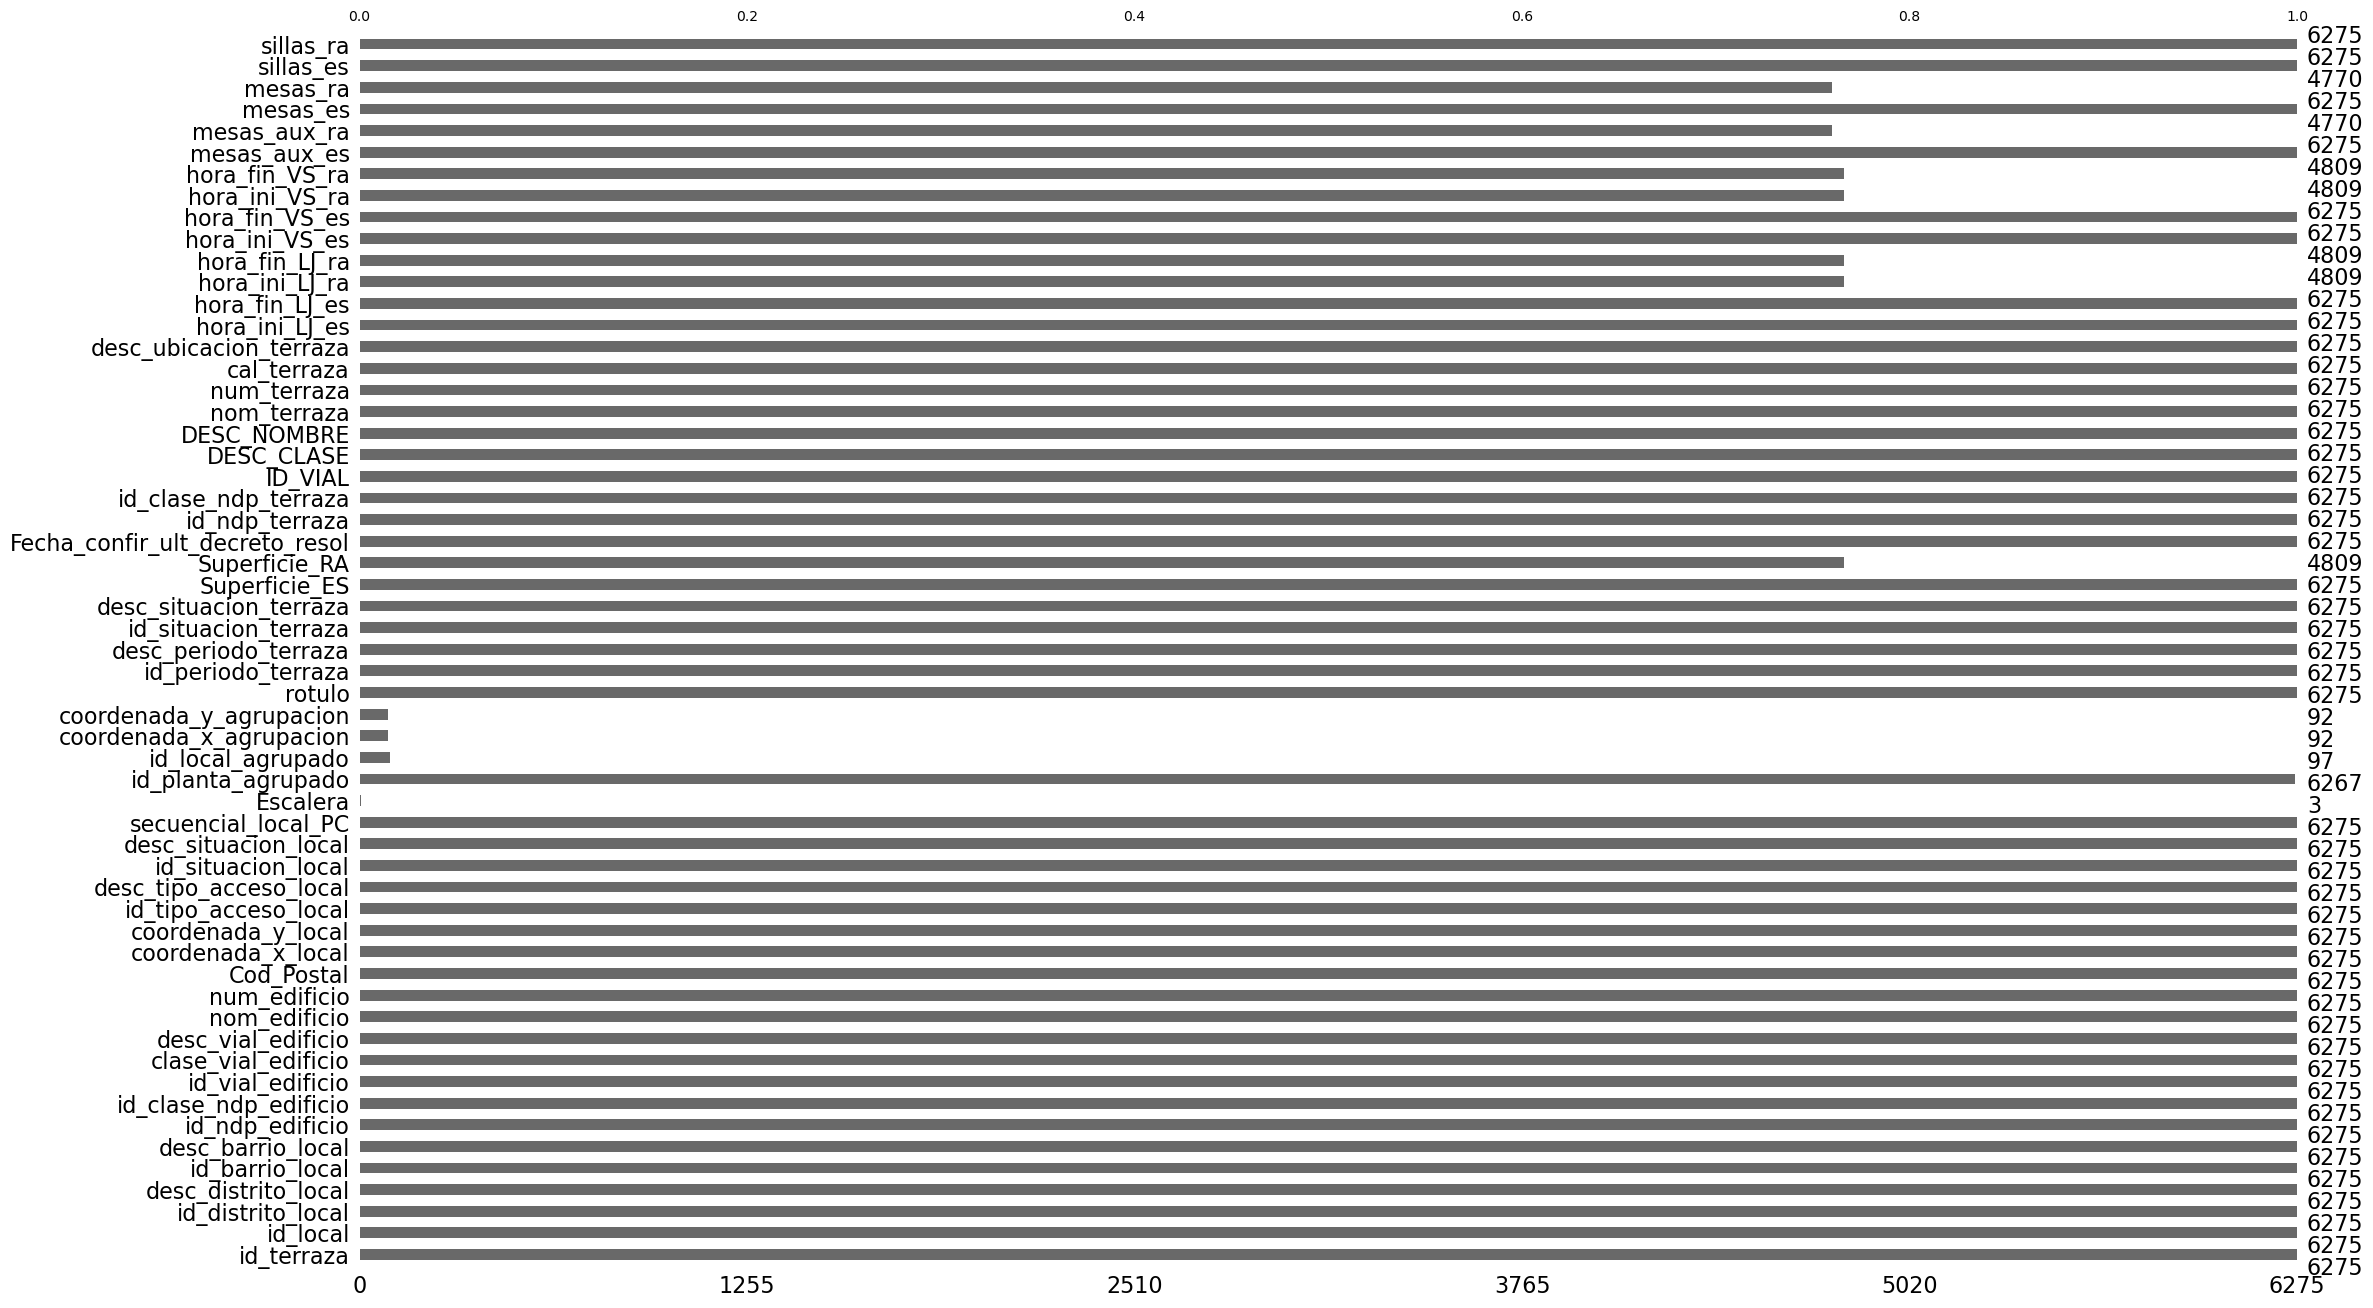

In [49]:
msno.bar(terrazas)

c:\Users\Yeider\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


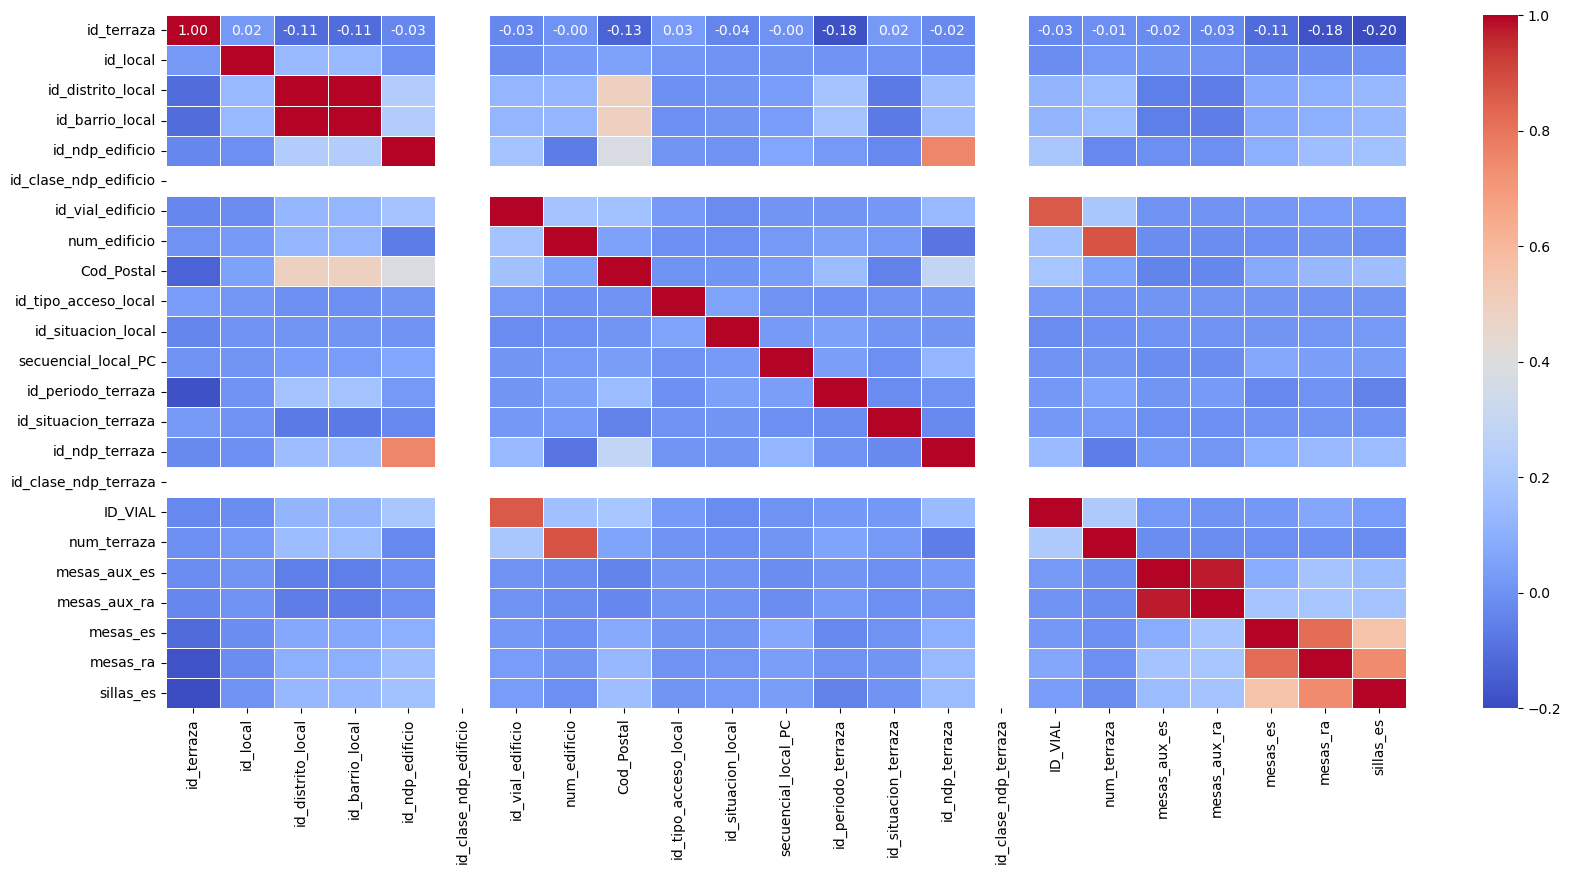

In [6]:
#msno.heatmap(terrazas)

# Filtrar solo columnas numéricas del DataFrame
plt.figure(figsize=(20, 9))
df_numerico = terrazas.select_dtypes(include=['number'])
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm', fmt=".2f",linewidth=.5)
plt.show()


<Axes: >

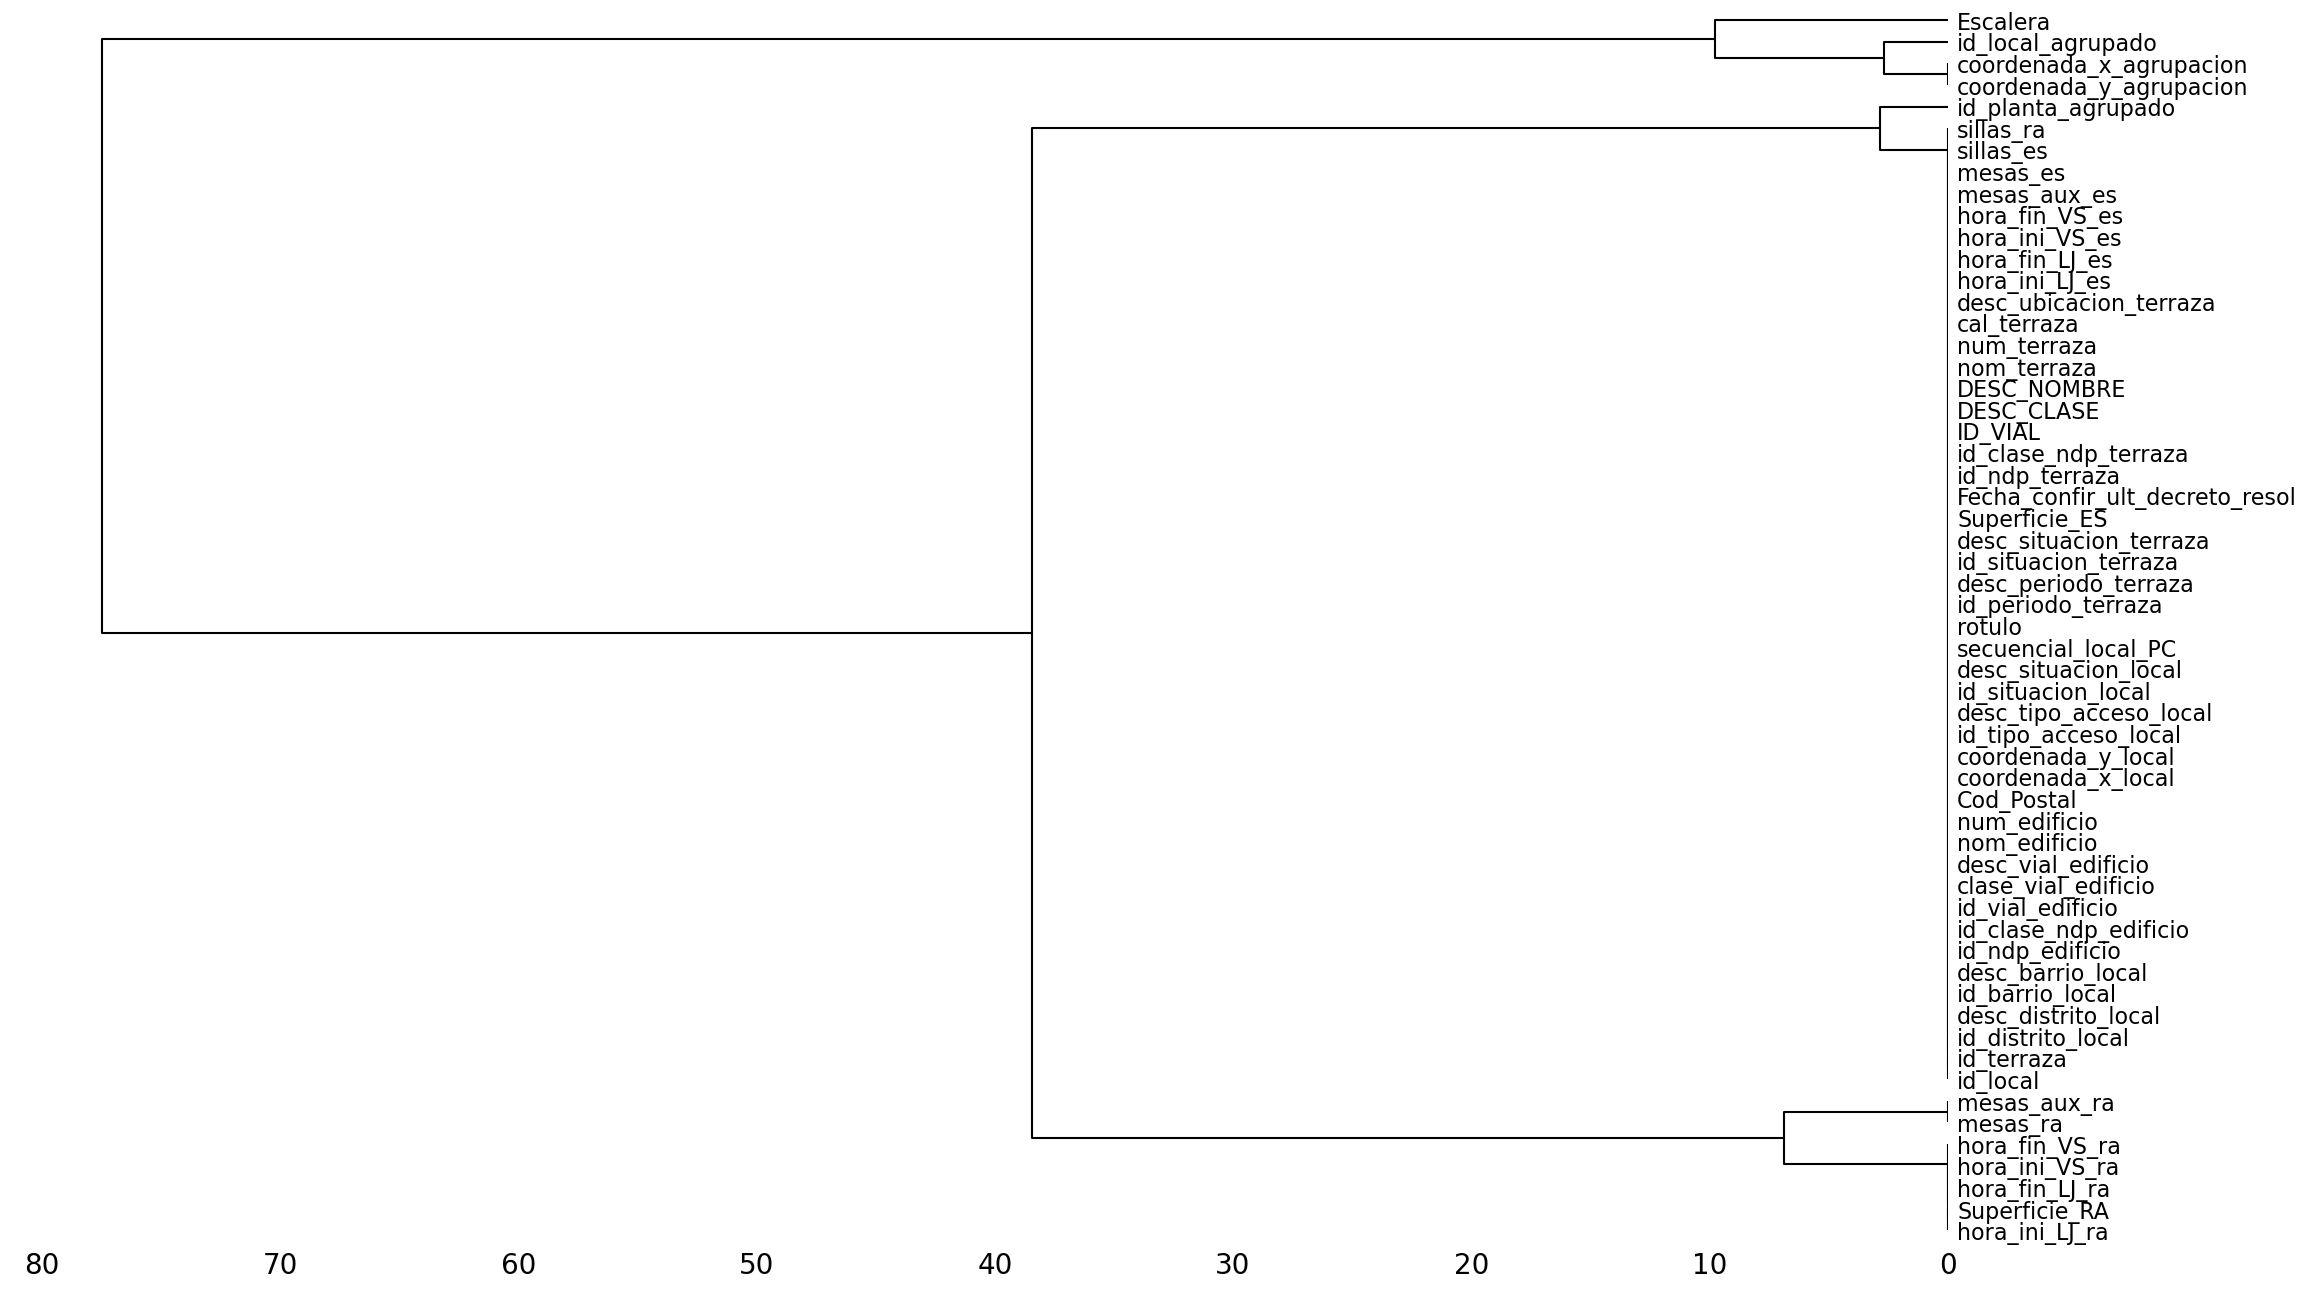

In [51]:
msno.dendrogram(terrazas)


c:\Users\Yeider\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Yeider\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Yeider\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Yeider\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

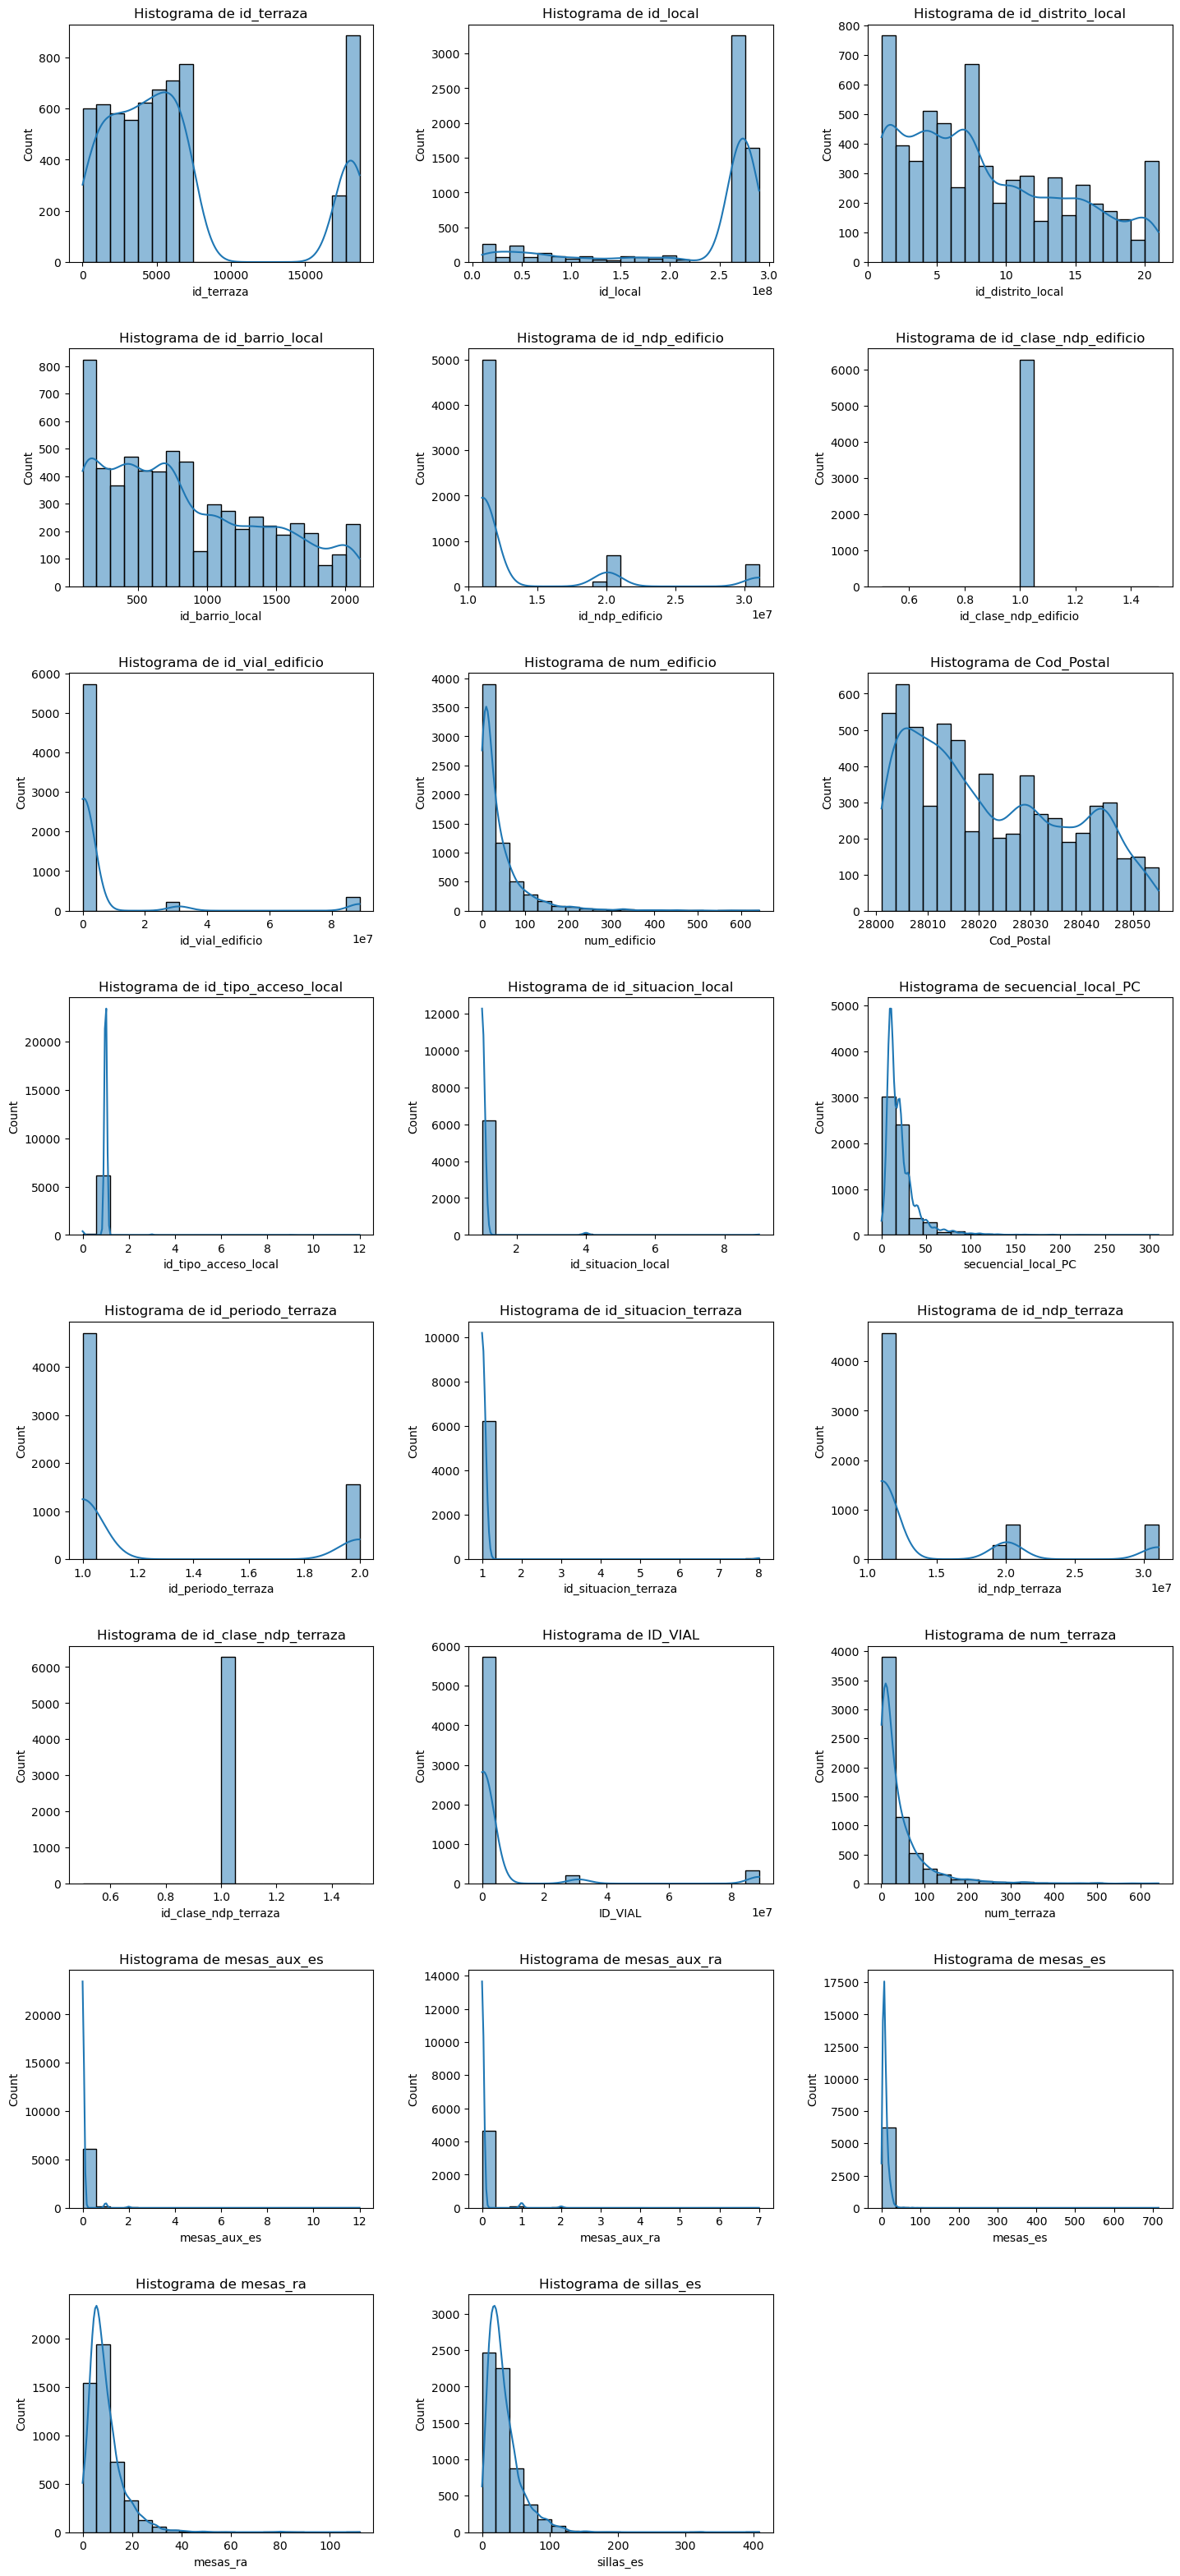

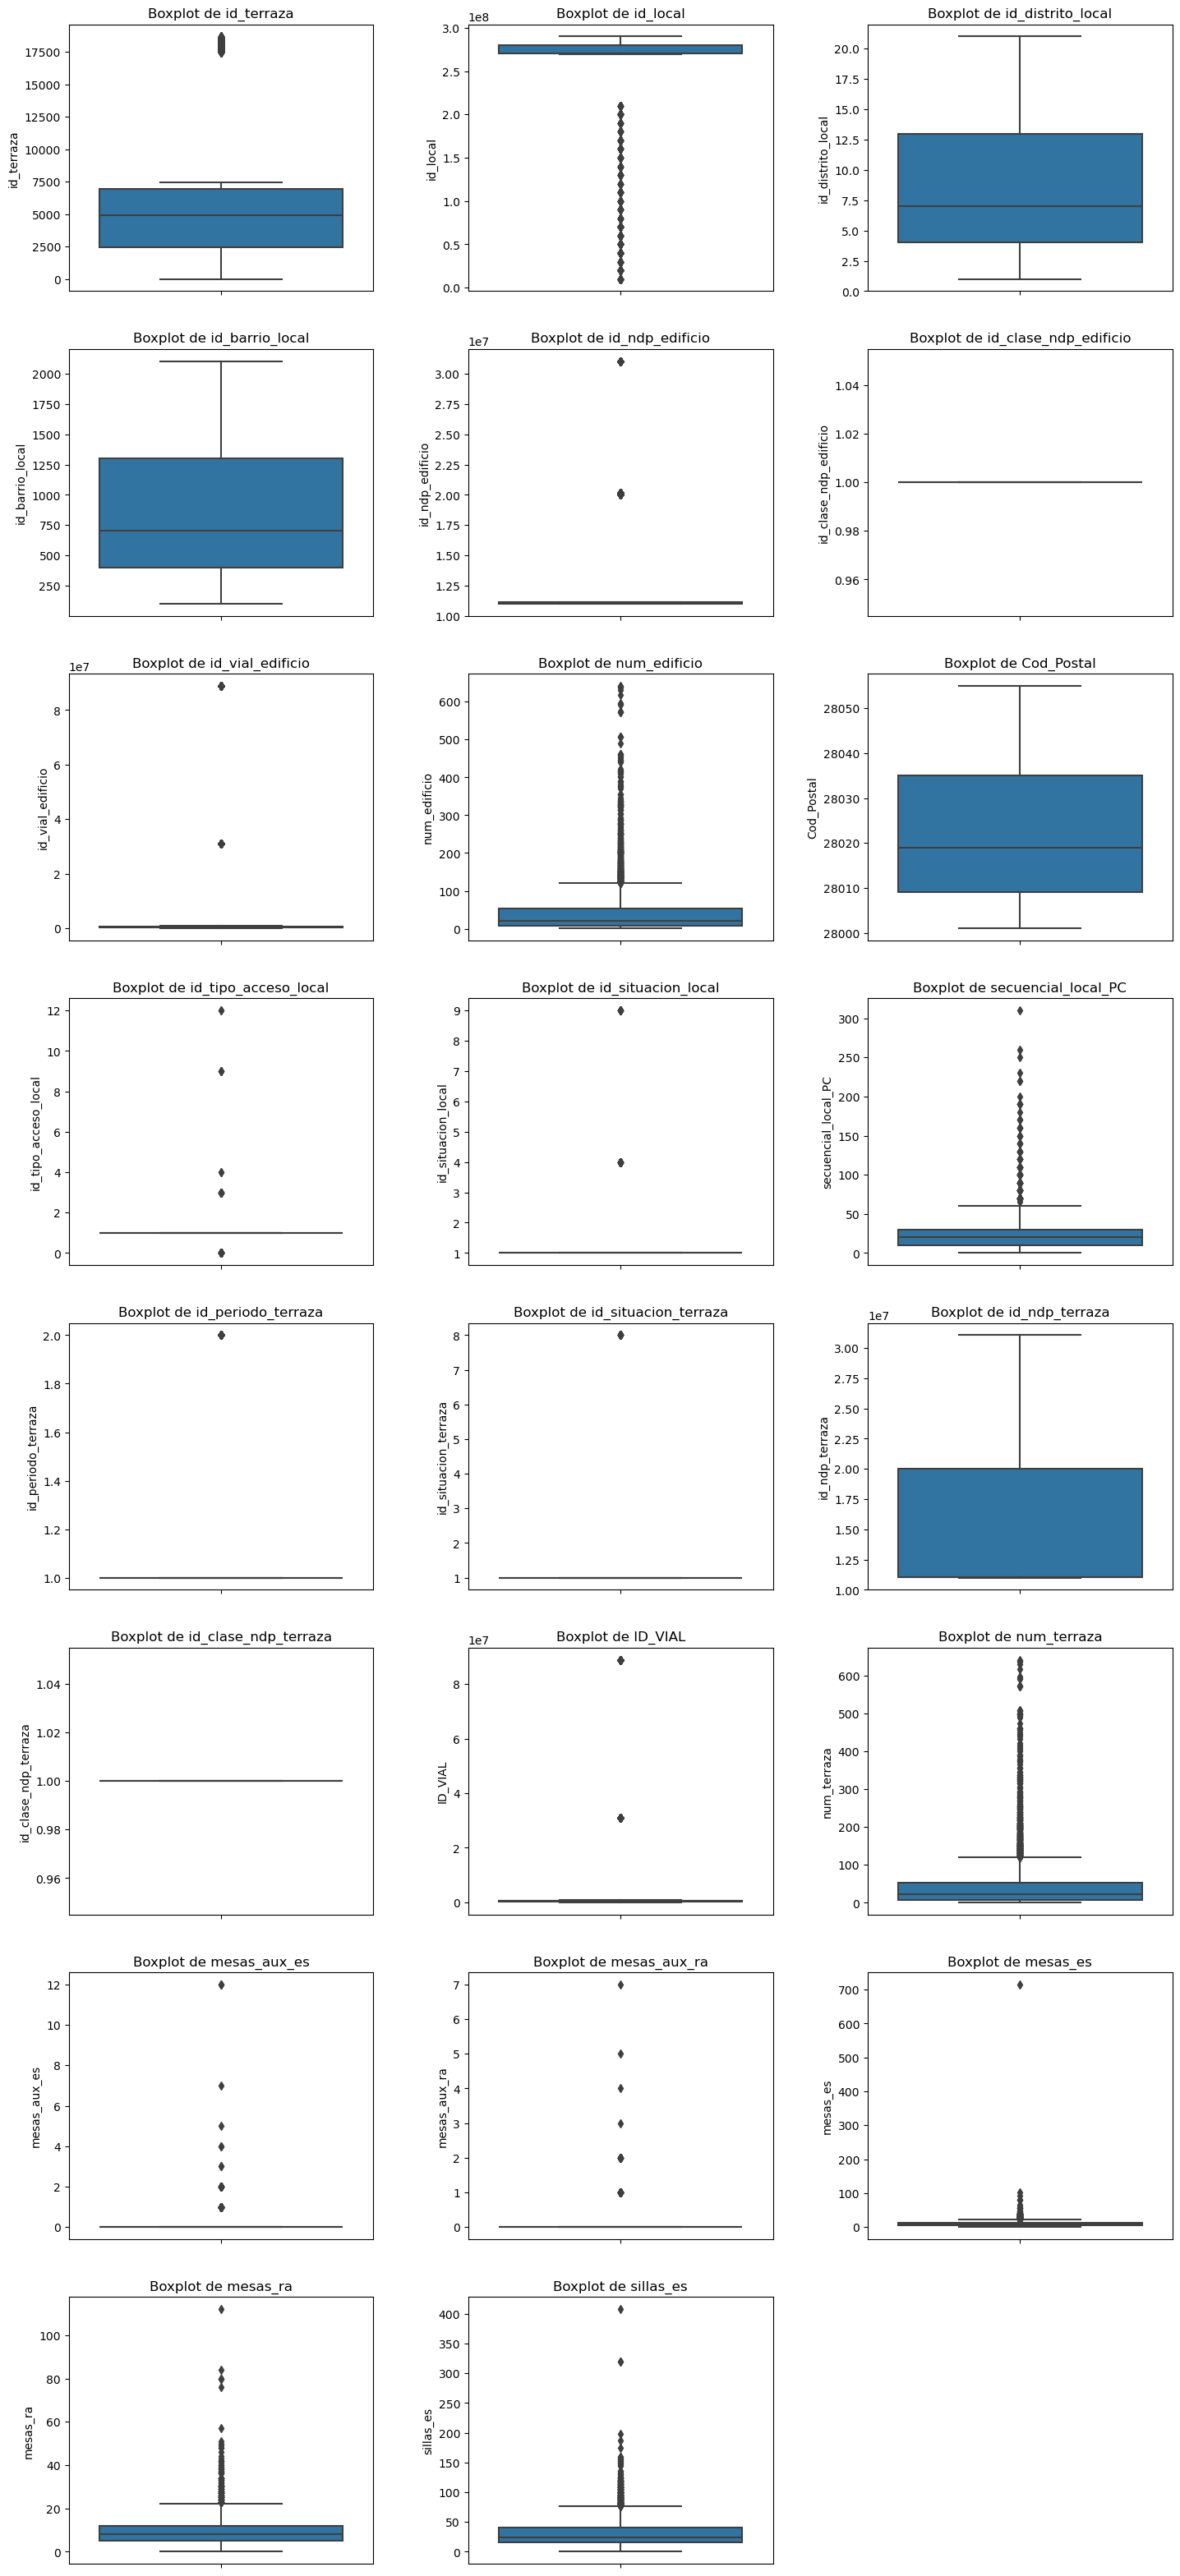

In [7]:
# Filtrar solo las columnas numéricas
numeric_columns = terrazas.select_dtypes(include=['float64', 'int64']).columns

# Filtrar solo las columnas numéricas
numeric_columns = terrazas.select_dtypes(include=['float64', 'int64']).columns

# Definir el tamaño de la cuadrícula según el número de columnas
num_plots = len(numeric_columns)
cols = 3  # Número de columnas de subplots (ajustable)
rows = (num_plots // cols) + (num_plots % cols > 0)  # Calcula el número de filas necesarias

# Crear los histogramas con  espacio entre ellos
plt.figure(figsize=(15, rows * 4))  # Ajustar el tamaño de la figura 
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(terrazas[col], kde=True, bins=20)
    plt.title(f'Histograma de {col}')
    plt.tight_layout(pad=3.0)  # Ajustar el padding entre subplots
plt.show()

# Crear los boxplots con espacio entre ellos
plt.figure(figsize=(15, rows * 4))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(data=terrazas, y=col)
    plt.title(f'Boxplot de {col}')
    plt.tight_layout(pad=3.0)  # Ajustar el padding entre subplots
plt.show()

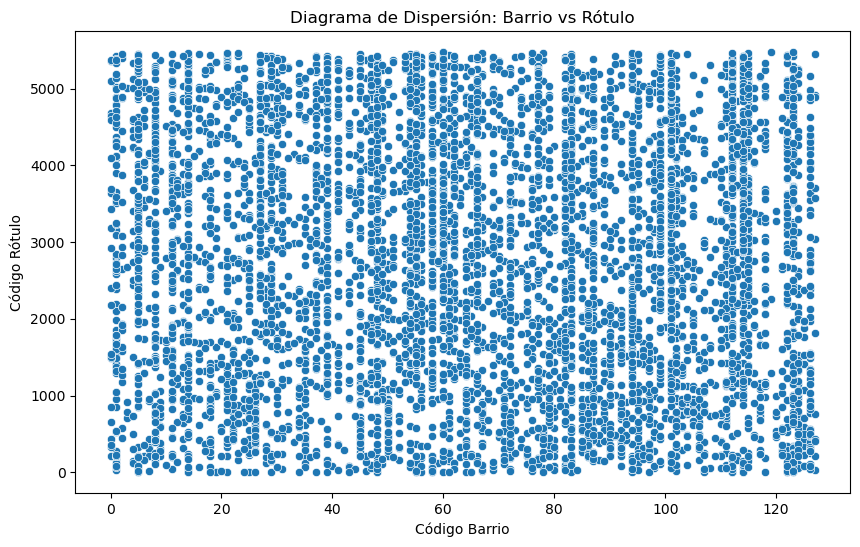

In [18]:
# CREAR DIAGRAMA DE DISPERSION 

#  Codificar las variables categóricas
terrazas['barrio_cod'] = terrazas['desc_barrio_local'].astype('category').cat.codes
terrazas['rotulo_cod'] = terrazas['rotulo'].astype('category').cat.codes

# Crear el diagrama de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='barrio_cod', y='rotulo_cod', data=terrazas)

# Agregar etiquetas a los ejes
plt.xlabel('Código Barrio')
plt.ylabel('Código Rótulo')
plt.title('Diagrama de Dispersión: Barrio vs Rótulo')
plt.show()

C:\Users\Yeider\AppData\Local\Temp\ipykernel_7072\144750068.py:11: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout(pad=2.0)
C:\Users\Yeider\AppData\Local\Temp\ipykernel_7072\144750068.py:11: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(pad=2.0)
C:\Users\Yeider\AppData\Local\Temp\ipykernel_7072\144750068.py:11: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(pad=2.0)
C:\Users\Yeider\AppData\Local\Temp\ipykernel_7072\144750068.py:11: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(pad=2.0)
C:\Users\Yeider\AppData\Local\Temp\ipykernel_7072\144750068.py:11: UserWarning: Tight layout not applied. tight_layout can

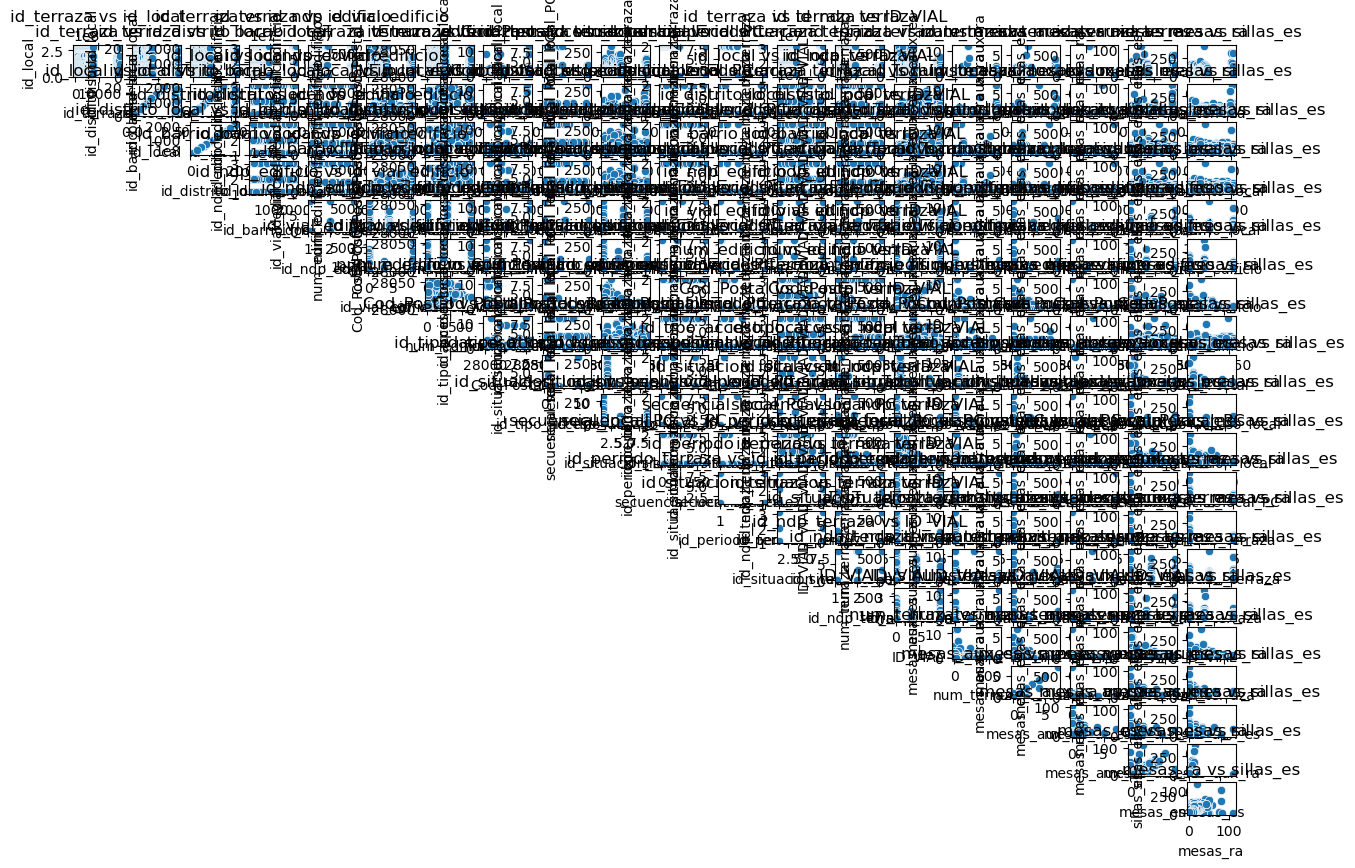

<Figure size 2000x2000 with 0 Axes>

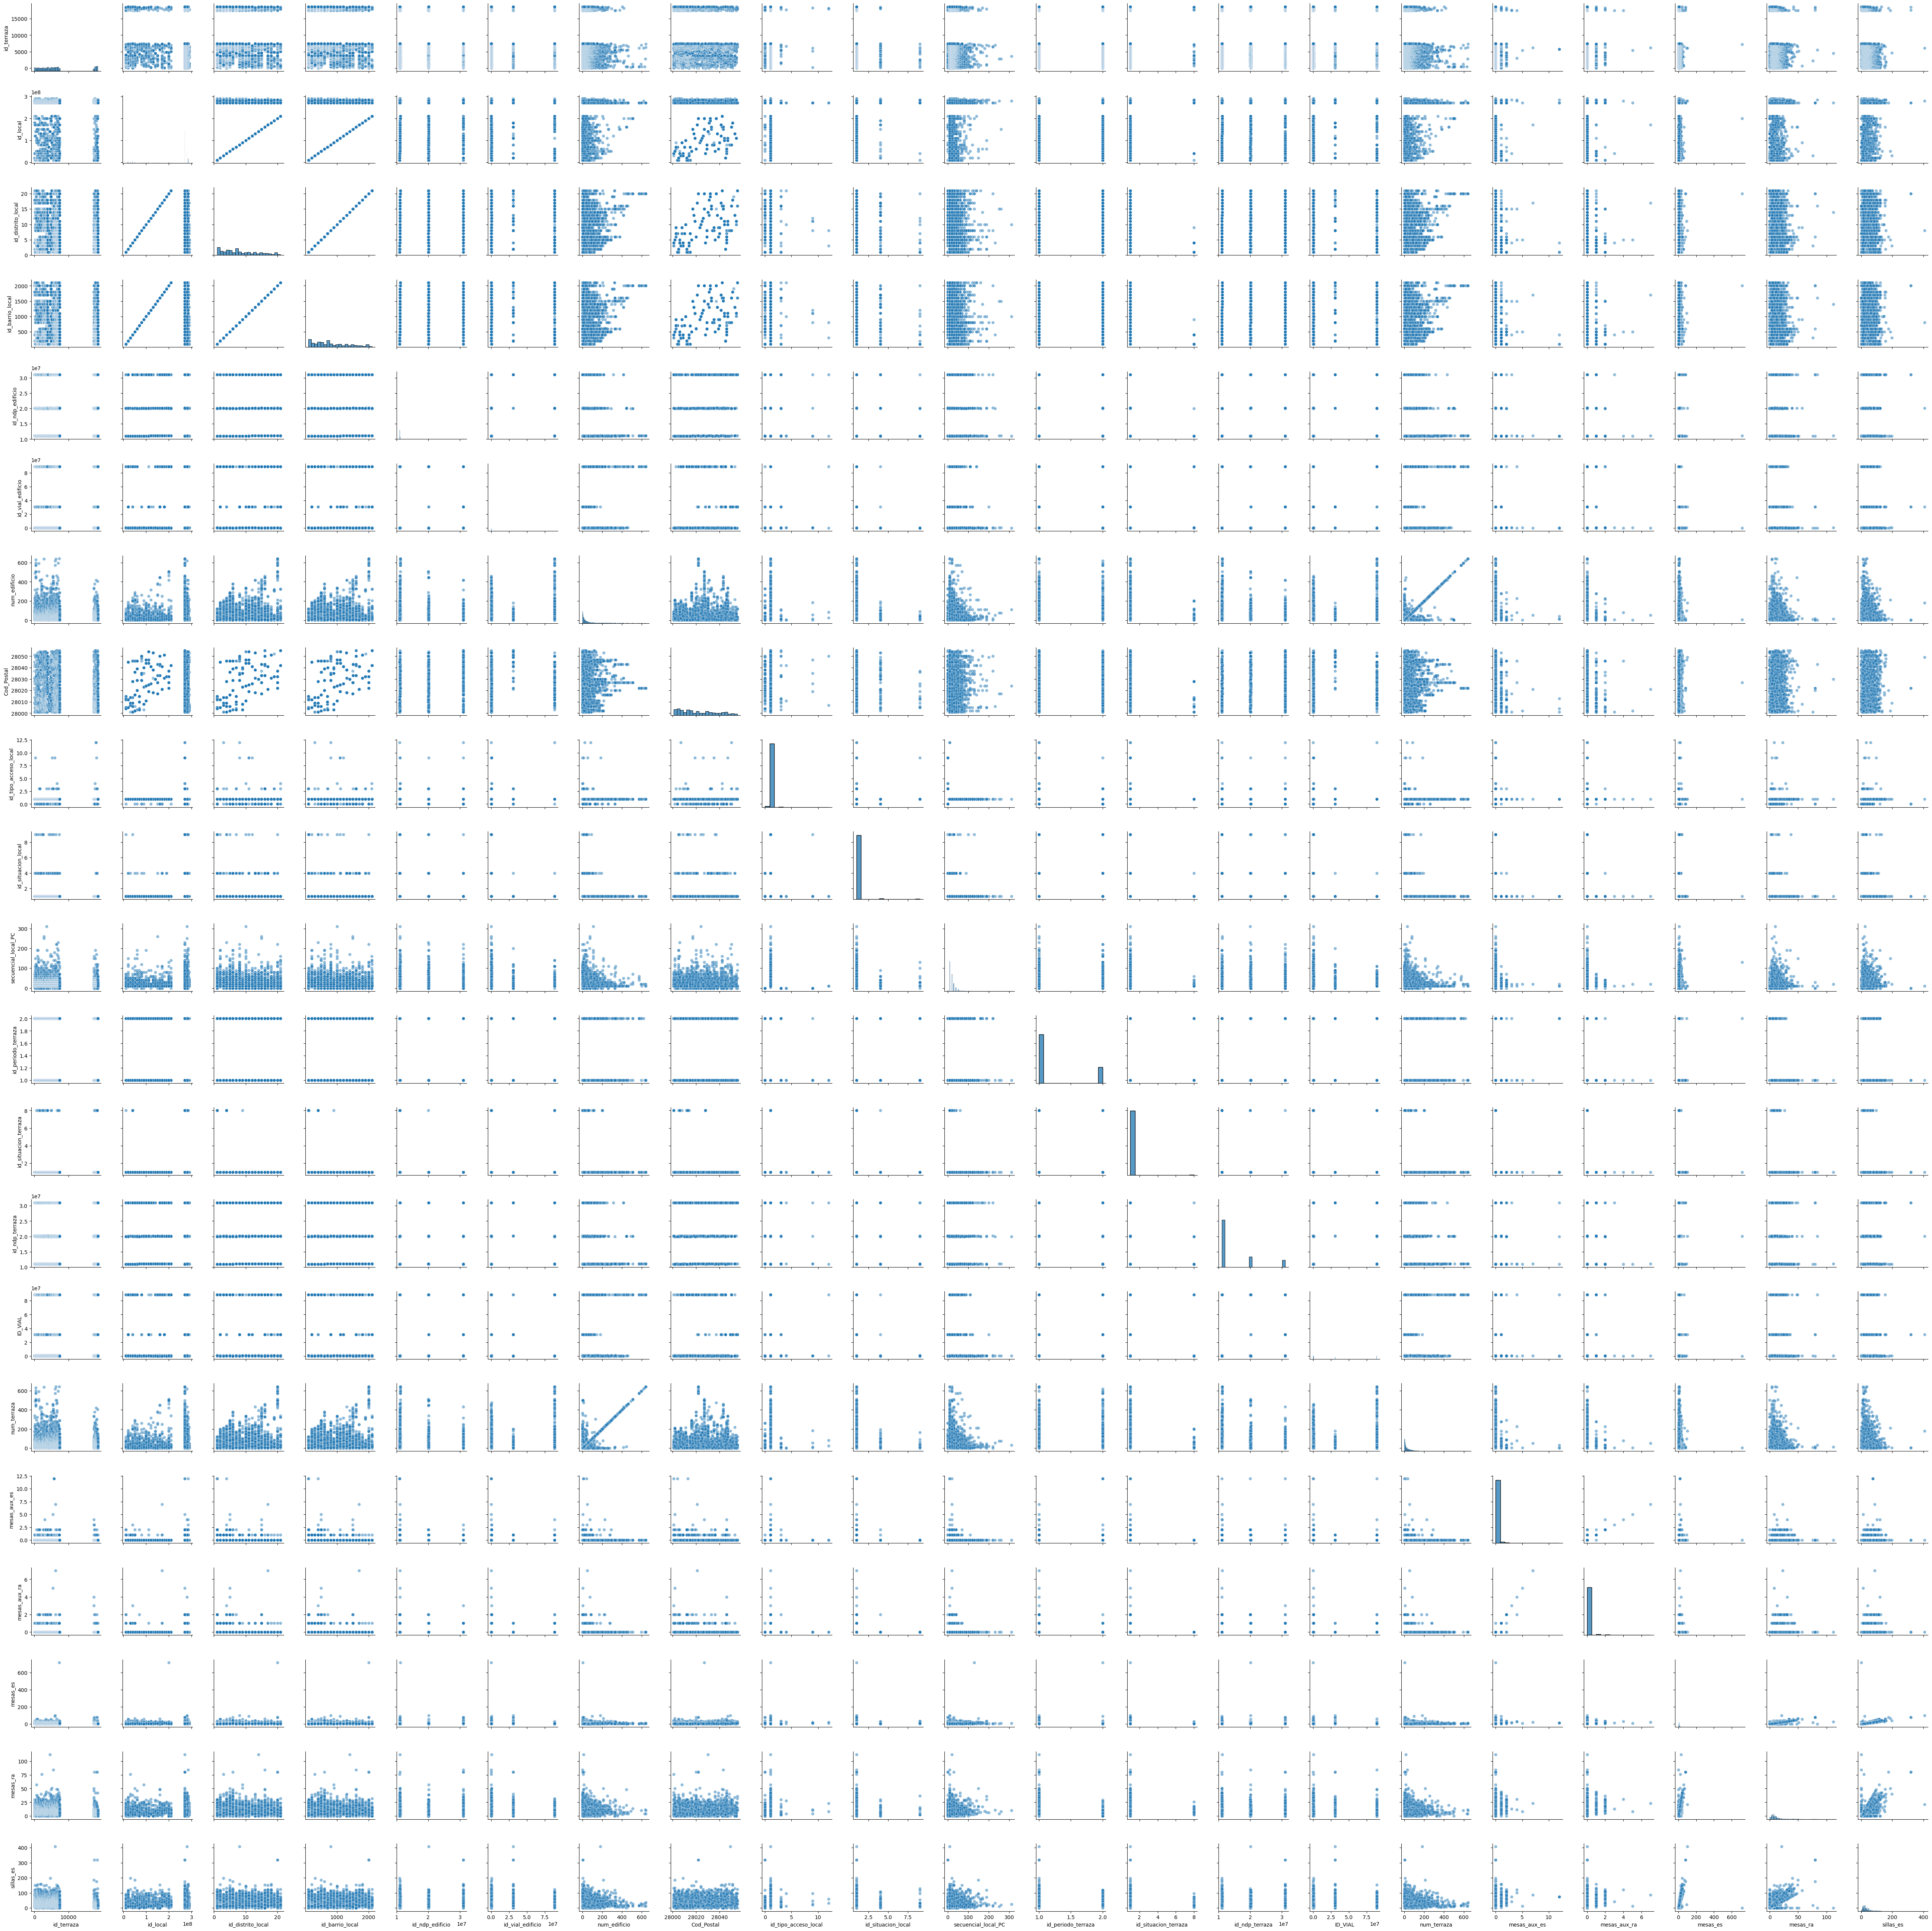

In [55]:
# Filtrar solo las columnas numéricas
numeric_columns = terrazas.select_dtypes(include=['float64', 'int64']).columns

# Crear gráficos de dispersión entre pares de variables numéricas
plt.figure(figsize=(15, 10))
for i in range(len(numeric_columns)):
    for j in range(i+1, len(numeric_columns)):
        plt.subplot(len(numeric_columns)-1, len(numeric_columns)-1, i * (len(numeric_columns)-1) + j)
        sns.scatterplot(x=terrazas[numeric_columns[i]], y=terrazas[numeric_columns[j]])
        plt.title(f'{numeric_columns[i]} vs {numeric_columns[j]}')
        plt.tight_layout(pad=2.0)

# Ajustar el tamaño de la figura y los subgráficos
plt.figure(figsize=(20, 20))  # Aumentar el tamaño de la figura
sns.pairplot(terrazas, plot_kws={'alpha': 0.5})  # Cambiar el valor alpha para mejorar la visibilidad
plt.tight_layout(pad=3.0)  # Aumentar el espaciado entre subgráficos

# Mostrar el gráfico
plt.show()

In [17]:
# transformar Superficie_ES y Superficie_RA en valores numéricos
terrazas['Superficie_RA'] = terrazas['Superficie_RA'].str.replace(',', '.').astype(float)
terrazas['Superficie_ES'] = terrazas['Superficie_ES'].str.replace(',', '.').astype(float)

In [18]:
# columnas a eliminar
columnas_a_eliminar = ['id_clase_ndp_edificio', 'id_clase_ndp_terraza', 'nom_terraza', 'nom_edificio', 'Escalera',
                    'id_local_agrupado', 'coordenada_x_agrupacion', 'coordenada_y_agrupacion']

# Bucle para validar si cada columna está en el DataFrame
for columna in columnas_a_eliminar:
    if columna in terrazas.columns:
        terrazas = terrazas.drop(columna, axis=1)  # Elimina la columna si existe
        print(f'Columna "{columna}" eliminada.')
    else:
        print(f'Columna "{columna}" no encontrada en el DataFrame.')

# Comprobar las columnas restantes
print("\nColumnas restantes:")
print(terrazas.columns)

Columna "id_clase_ndp_edificio" eliminada.
Columna "id_clase_ndp_terraza" eliminada.
Columna "nom_terraza" eliminada.
Columna "nom_edificio" eliminada.
Columna "Escalera" eliminada.
Columna "id_local_agrupado" eliminada.
Columna "coordenada_x_agrupacion" eliminada.
Columna "coordenada_y_agrupacion" eliminada.

Columnas restantes:
Index(['id_terraza', 'id_local', 'id_distrito_local', 'desc_distrito_local',
       'id_barrio_local', 'desc_barrio_local', 'id_ndp_edificio',
       'id_vial_edificio', 'clase_vial_edificio', 'desc_vial_edificio',
       'num_edificio', 'Cod_Postal', 'coordenada_x_local',
       'coordenada_y_local', 'id_tipo_acceso_local', 'desc_tipo_acceso_local',
       'id_situacion_local', 'desc_situacion_local', 'secuencial_local_PC',
       'id_planta_agrupado', 'rotulo', 'id_periodo_terraza',
       'desc_periodo_terraza', 'id_situacion_terraza',
       'desc_situacion_terraza', 'Superficie_ES', 'Superficie_RA',
       'Fecha_confir_ult_decreto_resol', 'id_ndp_terraza

In [20]:
# guardar el dataset editado
terrazas.to_excel('Terrazas_202104.xlsx', index=False)

In [7]:
import sweetviz as sv 

reporte = sv.analyze(terrazas,)
reporte.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
